# Opencv Basics


In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### open image

In [3]:
img  = cv.imread('1681000829675.jpg')

cv.imshow('dodo',img)

cv.waitKey(0)

-1

### Reading video

In [4]:
video = cv.VideoCapture(1)
while True:
    istrue , frame = video.read()
    cv.imshow('video', frame)
    if cv.waitKey(20) & 0xFF == ord('c'):
        break

video.release()
cv.destroyAllWindows()



## Resizing

In [5]:
#Works with images videos , live videos
def RescaleFrame(frame, scale = 0.05):
    width = int(frame.shape[1] * scale)
    hieght = int(frame.shape[0] * scale)
    diemensions = (width,hieght)
    return cv.resize(frame,diemensions,interpolation = cv.INTER_AREA)




#### Trying it

In [6]:

video = cv.VideoCapture('2.mp4')

while True:
    istrue , frame = video.read()
    frame_resized = RescaleFrame(frame)

    cv.imshow('video', frame_resized)
    if cv.waitKey(20) & 0xFF == ord('c'):
        break

video.release()
cv.destroyAllWindows()

### on image

In [7]:
img = cv.imread('1681000829675.jpg')

img2 = RescaleFrame(img)

cv.imshow('lol',img2)
cv.waitKey(0)

99

## Changing resolution

#### works only with live videos

In [8]:

def change_res(width,hieght,video):
    video.set(3,width)
    video.set(4,hieght)

## Blank image

In [9]:
blank = np.zeros((1000,1000,3) , dtype='uint8')



np.random.seed(5)
x = np.random.randint(1,256,size=10000).reshape(100,100)
print(x)
blank[200:300,200:500,0:300] = 0,255,100
cv.imshow('lol' , blank)

cv.rectangle(blank,(0,0),(255,255),(100,150,200) ,thickness=3)
cv.imshow('drawn',blank)

cv.rectangle(blank,(0,0),(255,255),(100,150,200) ,thickness=cv.FILLED)
cv.imshow('rectangle', blank)


#cv.FILLED can be -1 instead

# 3. Draw A circle
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255), thickness=-1)
cv.imshow('Circle', blank)

# 4. Draw a line
cv.line(blank, (100,250), (300,400), (255,255,255), thickness=3)
cv.imshow('Line', blank)

# 5. Write text
cv.putText(blank, 'Hello, my name is Jason!!!', (0,225), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), 2)
cv.imshow('Text', blank)

cv.waitKey(0)

# 3. Draw A circle
cv.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (0,0,255), thickness=-1)
cv.imshow('Circle', blank)

# 4. Draw a line
cv.line(blank, (100,250), (300,400), (255,255,255), thickness=3)
cv.imshow('Line', blank)

# 5. Write text
cv.putText(blank, 'Hello, my name is Jason!!!', (0,225), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), 2)
cv.imshow('Text', blank)

cv.waitKey(0)

[[100 207 240 ... 163 174 188]
 [153 142 119 ... 215 253 201]
 [161 144 111 ... 241 212 184]
 ...
 [161 225 233 ...  38 154 175]
 [206 222  26 ...   4 121 199]
 [119 253 235 ...  33 136 120]]


99

## convert to grey

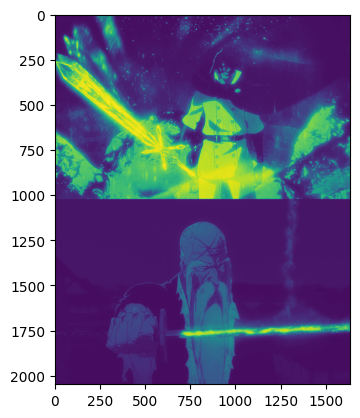

In [10]:
img = cv.imread('1681000829675.jpg')
grey = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv.imshow('lol',grey)
cv.waitKey(0)
plt.imshow(grey)

## Blur

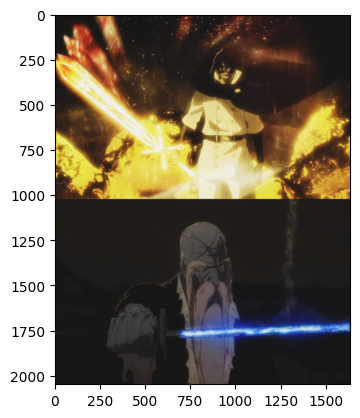

In [11]:
img = cv.imread('1681000829675.jpg')
blur = cv.GaussianBlur(img,(3,3),cv.BORDER_DEFAULT)
# the number in the tuple must be odd number
cv.imshow('lol',blur)
cv.waitKey(0)
plt.imshow(blur)

## Edge cascade

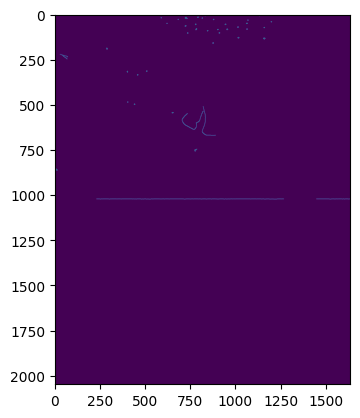

In [12]:
img = cv.imread('1681000829675.jpg')
canny = cv.Canny(blur,200,500)
cv.imshow('lol',canny)
cv.waitKey(0)
plt.imshow(canny)

## dailation

##### عشان تكبر حدود 

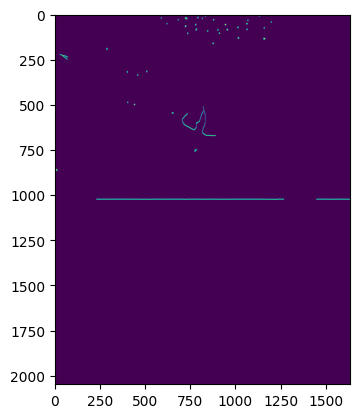

In [13]:
img = cv.imread('1681000829675.jpg')
dilated = cv.dilate(canny,(13,13), iterations = 3)
#

cv.imshow('lol',dilated)
cv.waitKey(0)
plt.imshow(dilated)



## Erodding

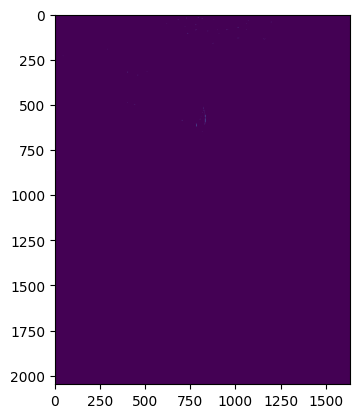

In [14]:
img = cv.imread('1681000829675.jpg')
erode = cv.erode(canny,(13,13), iterations = 3)
#

cv.imshow('lol',erode)
cv.waitKey(0)
plt.imshow(erode)



## Resize

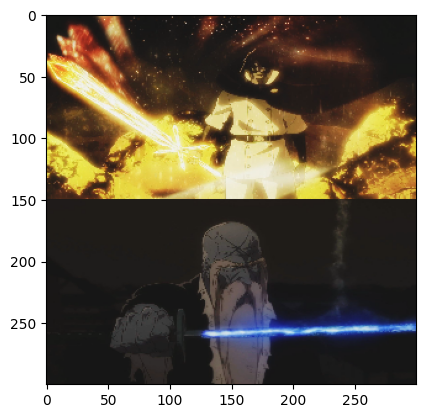

In [15]:
img = cv.imread('1681000829675.jpg')
resized = cv.resize(img,(300,300))

#you can use interpolation
resized = cv.resize(img,(300,300),interpolation = cv.INTER_CUBIC)


cv.imshow('lol',resized)
cv.waitKey(0)
plt.imshow(resized)



## Cropping

In [16]:
img = cv.imread('1681000829675.jpg')

crop_area = img[500:520,200:300]

cv.imshow('lol',crop_area)
cv.waitKey(0)

## translation


In [4]:
def translate(img,x,y):
    transmat = np.float32([[1,0,x],[0,1,y]])
    diemensions = (img.shape[0],img.shape[1])
    return cv.warpAffine(img,transmat,diemensions)


## using it

In [5]:
img = cv.imread('1681000829675.jpg')
translated = translate(img,500,60)
cv.imshow('jhjk',translated)
cv.waitKey(0)

-1

## rotation

In [ ]:
def rotate (img, angle, RotPoint = None):
    (hieght,width) = img.shape[:2]
    if RotPoint == None:
        RotPoint = (width//2 , hieght // 2)
    dimensions = (width,hieght)
    RotMat = cv.getRotationMatrix2D(RotPoint,angle,1.0)
    return cv.warpAffine(img,RotMat,dimensions)

## try it

In [ ]:
img = cv.imread('1681000829675.jpg')
rotated = rotate(img,45)
cv.imshow('jhjk',rotated)
cv.waitKey(0)

-1

## resizing

In [ ]:
img = cv.imread('1681000829675.jpg')
resized = cv.resize(img,(800,300),interpolation=cv.INTER_AREA)
cv.imshow('jhjk',resized)
cv.waitKey(0)

-1

## Flipping

In [ ]:
img = cv.imread('1681000829675.jpg')
flipped = cv.flip(img,0)
cv.imshow('jhjk',flipped)
cv.waitKey(0)

-1

## Contours

In [ ]:
img = cv.imread('12067400-600x450.jpeg')
blank = np.zeros(img.shape ,dtype='uint8')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT)
canny = cv.Canny(blur,200,200)

#treshold
ret , tresh = cv.threshold(gray,125,255,cv.THRESH_BINARY)
contours , hierarchies = cv.findContours(tresh,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)

contours_img = cv.drawContours(blank,contours,-1,(0,200,0),thickness=1)
#-1 to take all values in contour list
print(len(contours))
cv.imshow('canny' , canny)
cv.imshow('tresh' , tresh)
cv.imshow('contours' , contours_img)
cv.waitKey(0)

4053


-1

# Color channels

In [ ]:
img = cv.imread('1681000829675.jpg')
np.random.seed(500)
noise = np.random.randint(0,255,img.shape,dtype='uint8')
blank = np.zeros(img.shape[:2],dtype='uint8')
b,g,r= cv.split(img)
f = cv.merge([blank,blank,r])
print(img.shape[:2])
cv.imshow('sa',f)
cv.waitKey(0)



(800, 800)


-1

# Blur

In [ ]:
img = cv.imread('1681000829675.jpg')

# averaging
average = cv.blur(img, (3,3))
cv.imshow('avg',average)

# GaussianBlur
gaus = cv.GaussianBlur(img,(3,3),0)
cv.imshow('gaus',gaus)

# median blur
median = cv.medianBlur(img,3)
cv.imshow('median',median)

#bailatral
# راجع عليها
bilatral = cv.bilateralFilter(img,15,35,35)
cv.imshow('bilatral',bilatral)


cv.waitKey(0)

-1

# Bitwise operartors

In [ ]:
blank = np.zeros((500,500), dtype='uint8')


# -1 to fill the color
rectangle = cv.rectangle(blank.copy(), (200,50) , (50,200) , 255 , -1)
circle = cv.circle(blank.copy() , (250,250) , 200 ,255 , -1)

cv.imshow('rectangle' , rectangle)



cv.imshow('circle' , circle)

# Bitwise:
#And

bitwise_and = cv.bitwise_and(rectangle,circle)

cv.imshow('and',bitwise_and)


#Or

bitwise_or = cv.bitwise_or(rectangle,circle)

cv.imshow('and',bitwise_or)


#Xor

bitwise_xor = cv.bitwise_xor(rectangle,circle)

cv.imshow('and',bitwise_xor)

#Not

bitwise_not = cv.bitwise_not(rectangle)

cv.imshow('not',bitwise_not)

cv.waitKey(0)

-1

# Masks

In [ ]:
img = cv.imread('1681000829675.jpg')

blank = np.zeros(img.shape[:2], dtype='uint8')



# -1 to fill the color
rectangle = cv.rectangle(blank.copy(), (200,50) , (50,200) , 255 , -1)

masked = cv.bitwise_and(img,img,mask=rectangle)

cv.imshow('fpkod',masked)

cv.waitKey(0)

-1

# Histograms

(array([[1.617e+03, 1.150e+02, 4.300e+01, ..., 1.210e+02, 0.000e+00,
         0.000e+00],
        [1.621e+03, 1.090e+02, 4.100e+01, ..., 1.290e+02, 0.000e+00,
         0.000e+00],
        [1.626e+03, 1.070e+02, 3.800e+01, ..., 1.350e+02, 3.000e+00,
         0.000e+00],
        ...,
        [1.578e+03, 9.600e+01, 6.800e+01, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [1.581e+03, 9.600e+01, 6.800e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.586e+03, 9.000e+01, 6.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 array([ 14.,  37.,  60.,  83., 106., 129., 152., 175., 198., 221., 244.]),
 <a list of 1638 BarContainer objects>)

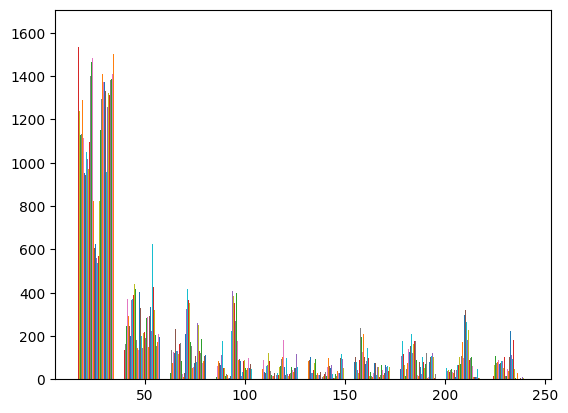

In [3]:
img = cv.imread('1681000829675.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.hist(gray)